## Carga de la data desde Kaggle

In [2]:
import numpy as np 
import pandas as pd

In [6]:
import os

# Cambia la ruta a tu directorio local
for dirname, _, filenames in os.walk('C:/Users/Jcnaz/AnalisisSentimientos/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Jcnaz/AnalisisSentimientos/kaggle/input\database.sqlite
C:/Users/Jcnaz/AnalisisSentimientos/kaggle/input\hashes.txt
C:/Users/Jcnaz/AnalisisSentimientos/kaggle/input\Reviews.csv


Librerias necesarias para la manipulacion, analisis de sentimiento y el modelo

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [9]:
df = pd.read_csv('C:/Users/Jcnaz/AnalisisSentimientos/kaggle/input\Reviews.csv')
#Dimensiones del dataframe
print(df.shape)
df = df.head(500)
#Numero de filas y columnas
print(df.shape)

(568454, 10)
(500, 10)


In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Analisis del Dataset

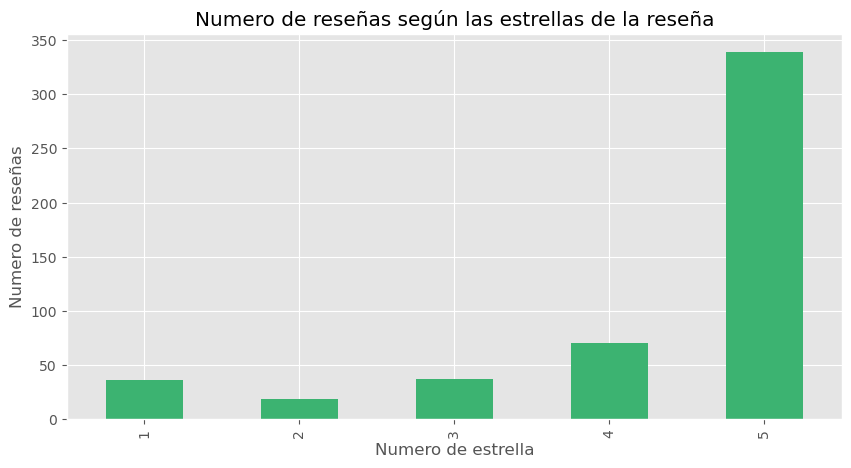

In [12]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          color='#3CB371',
          title='Numero de reseñas según las estrellas de la reseña',
          figsize=(10, 5))
ax.set_xlabel('Numero de estrella')
ax.set_ylabel('Numero de reseñas')



plt.show()

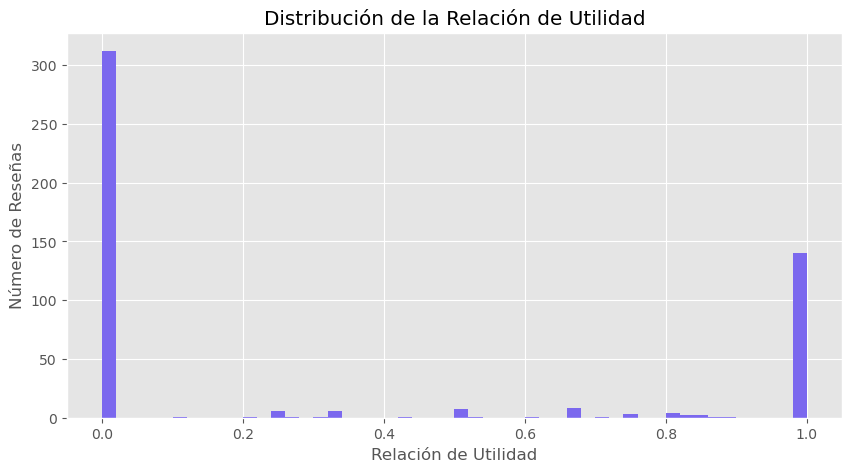

In [14]:
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
plt.figure(figsize=(10, 5))
plt.hist(df['HelpfulnessRatio'], bins=50, color='#7B68EE')
plt.title('Distribución de la Relación de Utilidad')
plt.xlabel('Relación de Utilidad')
plt.ylabel('Número de Reseñas')
plt.show()


C:\Users\Jcnaz\AppData\Local\Temp\ipykernel_29588\1305956497.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('ReviewTime')['Id'].resample('M').count().plot(figsize=(10, 5), color='teal')


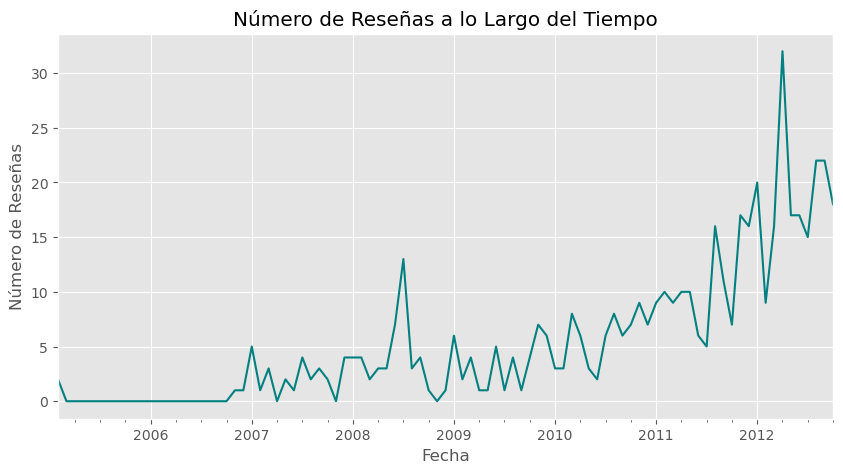

In [16]:
df['ReviewTime'] = pd.to_datetime(df['Time'], unit='s')  # Asumiendo que 'Time' está en formato UNIX
df.set_index('ReviewTime')['Id'].resample('M').count().plot(figsize=(10, 5), color='teal')
plt.title('Número de Reseñas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Reseñas')
plt.show()


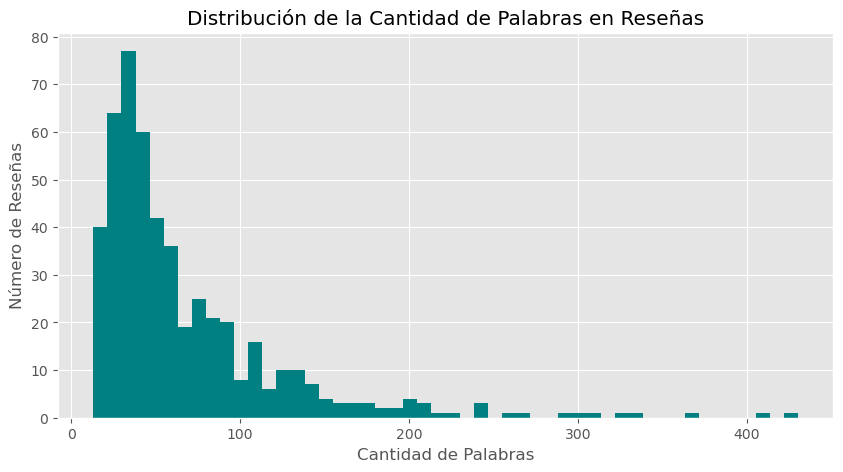

In [17]:
df['WordCount'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(df['WordCount'], bins=50, color='teal')
plt.title('Distribución de la Cantidad de Palabras en Reseñas')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Número de Reseñas')
plt.show()


## Limpieza del dataset

Se muestra algunas operaciones básicas del Natural Language Toolkit (NLTK) que puede realizar en sus datos de texto, como tokenización, eliminación de palabras vacías, derivación, lematización y etiquetado de partes del discurso.

In [30]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words') 
from nltk.tokenize import word_tokenize

example = df['Text'][50]
print(example)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jcnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jcnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Jcnaz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jcnaz\AppData\Roaming\nltk_data...


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


[nltk_data]   Unzipping corpora\words.zip.


NLTK pueda dividir las oraciones en palabras o tokens

In [24]:
tokens = word_tokenize(example)
print(tokens)


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [28]:
##Etiquetar partes del discurso con categorias gramaticales
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [32]:
## Reconocimiento de entidades
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## Puntuación de sentimiento VADER


Para realizar un análisis de sentimiento utilizando SentimentIntensityAnalyzer (VADER) de NLTK

In [36]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jcnaz\AppData\Roaming\nltk_data...


Análisis de sentimiento: SentimentIntensityAnalyzer calcula las puntuaciones de sentimiento, que incluyen:

neg: la proporción de texto que expresa un sentimiento negativo.

neu: La proporción de texto que es neutral.

pos: la proporción de texto que expresa un sentimiento positivo.

compuesto: una puntuación normalizada que combina las puntuaciones anteriores en un solo valor, que va desde -1 (más negativo) a 1 (más positivo).


In [37]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [38]:
from tqdm import tqdm  # Ensure tqdm is imported if used

# Initialize an empty dictionary to store results
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    
    # Check the text and ID to ensure they are not empty or NaN
    if pd.notna(text) and pd.notna(myid):
        res[myid] = sia.polarity_scores(text)
    else:
        print(f"Skipping row {i} due to missing values.")


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1682.86it/s]


## Calcular puntuaciones de sentimiento y crear marco de datos

In [39]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,WordCount
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011-04-27,48
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,2012-09-07,31
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008-08-18,94
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011-06-13,41
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,2012-10-21,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.0,2008-01-27,33
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.0,2007-12-04,65
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.0,2007-08-09,148
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.0,2007-07-12,35


## Visualice las puntuaciones de sentimiento

Puntuación compuesta por Amazon Star Review,  Puntuaciones positivas, neutrales y negativas de Amazon Star Review

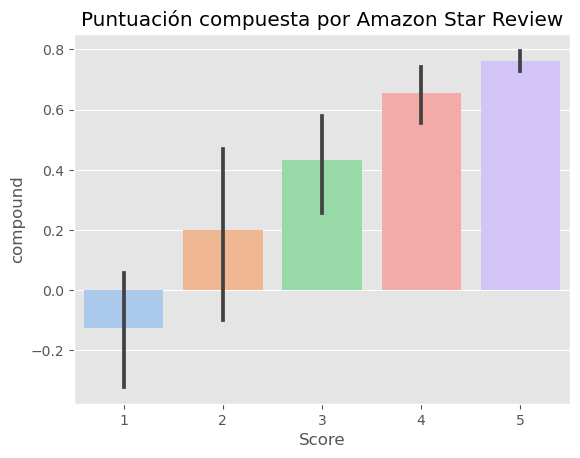

In [40]:
# Define custom colors
custom_palette = sns.color_palette("pastel")

ax = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_palette)
ax.set_title('Puntuación compuesta por Amazon Star Review')
plt.show()

Creando el DataFrame

vaders DataFrame se crea a partir de los resultados del sentimiento. Cada fila corresponde a una reseña y se agregan las puntuaciones de opinión (compuesta, pos, neu, neg).

Fusionando DataFrame:

vaders se fusiona con el df DataFrame original para combinar las puntuaciones de sentimiento con la información de revisión.

Visualización:

El primer gráfico muestra la puntuación de sentimiento compuesta (sentimiento general) por calificación de estrellas de reseña. El segundo conjunto de gráficos muestra las puntuaciones de sentimiento positivo, neutral y negativo para cada calificación de estrellas de reseña, brindando una vista detallada de cómo el sentimiento varía con la calificación.

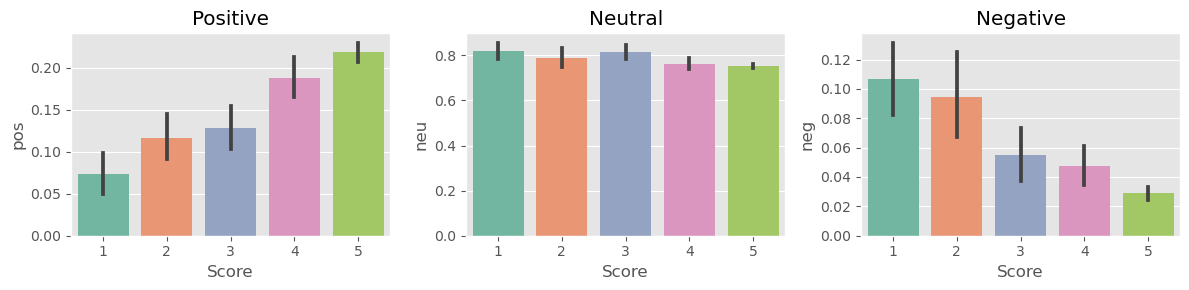

In [41]:
custom_palette = sns.color_palette("Set2")

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette=custom_palette)
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette=custom_palette)
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette=custom_palette)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Entrenamiento de modelo Roberta

Modelo RoBERTa (Robustly Optimized BERT Pretraining Approach) fue desarrollado por Facebook AI y ha demostrado ser más robusto y eficaz en tareas de clasificación de texto, análisis de sentimiento,

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Paso 1: Define el nombre del modelo preentrenado que quieres usar (en este caso, un modelo de RoBERTa para análisis de sentimiento en Twitter).
Paso 2: Carga el tokenizador asociado al modelo RoBERTa, que será responsable de convertir el texto de entrada en los tokens que el modelo pueda procesar.
Paso 3: Carga el modelo preentrenado de RoBERTa para realizar la tarea de clasificación de sentimiento (positivo, neutral, negativo).

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\Jcnaz\anaconda3\Lib\site-packages\huggingface_hub-0.24.2-py3.8.egg\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\Jcnaz\anaconda3\Lib\site-packages\huggingface_hub-0.24.2-py3.8.egg\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Jcnaz\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

C:\Users\Jcnaz\anaconda3\Lib\site-packages\huggingface_hub-0.24.2-py3.8.egg\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [45]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

## Analiza el sentimiento de un texto usando el modelo de Roberta:

Aquí vamos a analizar el sentimiento de un texto determinado utilizando el modelo de Roberta de la biblioteca de transformadores de Hugging Face. El proceso implica tokenizar el texto, pasarlo por el modelo y luego aplicar la función softmax para obtener probabilidades de sentimientos negativos, neutrales y positivos.

In [46]:


# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)



{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


La función polarity_scores_roberta está diseñada para analizar el sentimiento de un texto determinado utilizando el modelo de Roberta de la biblioteca de transformadores de Hugging Face. La función realiza tokenización, inferencia de modelos, aplica softmax a la salida y luego devuelve las puntuaciones de opinión en formato de diccionario.

Esto devolverá los resultados del análisis de sentimientos para el texto dado, mostrando las probabilidades de sentimientos negativos, neutrales y positivos según el modelo de Roberta.

In [47]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

Aquí teníamos la intención de ejecutar un análisis de sentimiento en un conjunto de datos de reseñas de Amazon, combinando resultados tanto de VADER (un modelo basado en reglas) como de Roberta (un modelo basado en transformadores). Itera sobre cada fila en el marco de datos (df), procesa el texto usando ambos modelos y luego almacena los resultados en un diccionario (res) codificado por el ID de revisión (myid).

## Después de ejecutar el código:

Una vez que se complete el ciclo, tendremos un diccionario que contiene las puntuaciones de sentimiento para cada revisión en nuestro conjunto de datos. Luego podemos convertir este diccionario en un DataFrame para su posterior análisis, visualización o modelado.

In [48]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|█████████████▌                                                                   | 84/500 [00:15<01:39,  4.17it/s]

Broke for id 83


 38%|██████████████████████████████                                                  | 188/500 [00:33<00:38,  8.04it/s]

Broke for id 187


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:41<00:00,  4.94it/s]


In [49]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [50]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'HelpfulnessRatio', 'ReviewTime',
       'WordCount'],
      dtype='object')

## Combinar y comparar

Para visualizar las relaciones entre las puntuaciones de sentimiento de VADER y RoBERTa con respecto a la puntuación de revisión, podemos utilizar el diagrama de pares de Seaborn.



C:\Users\Jcnaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jcnaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Jcnaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jcnaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

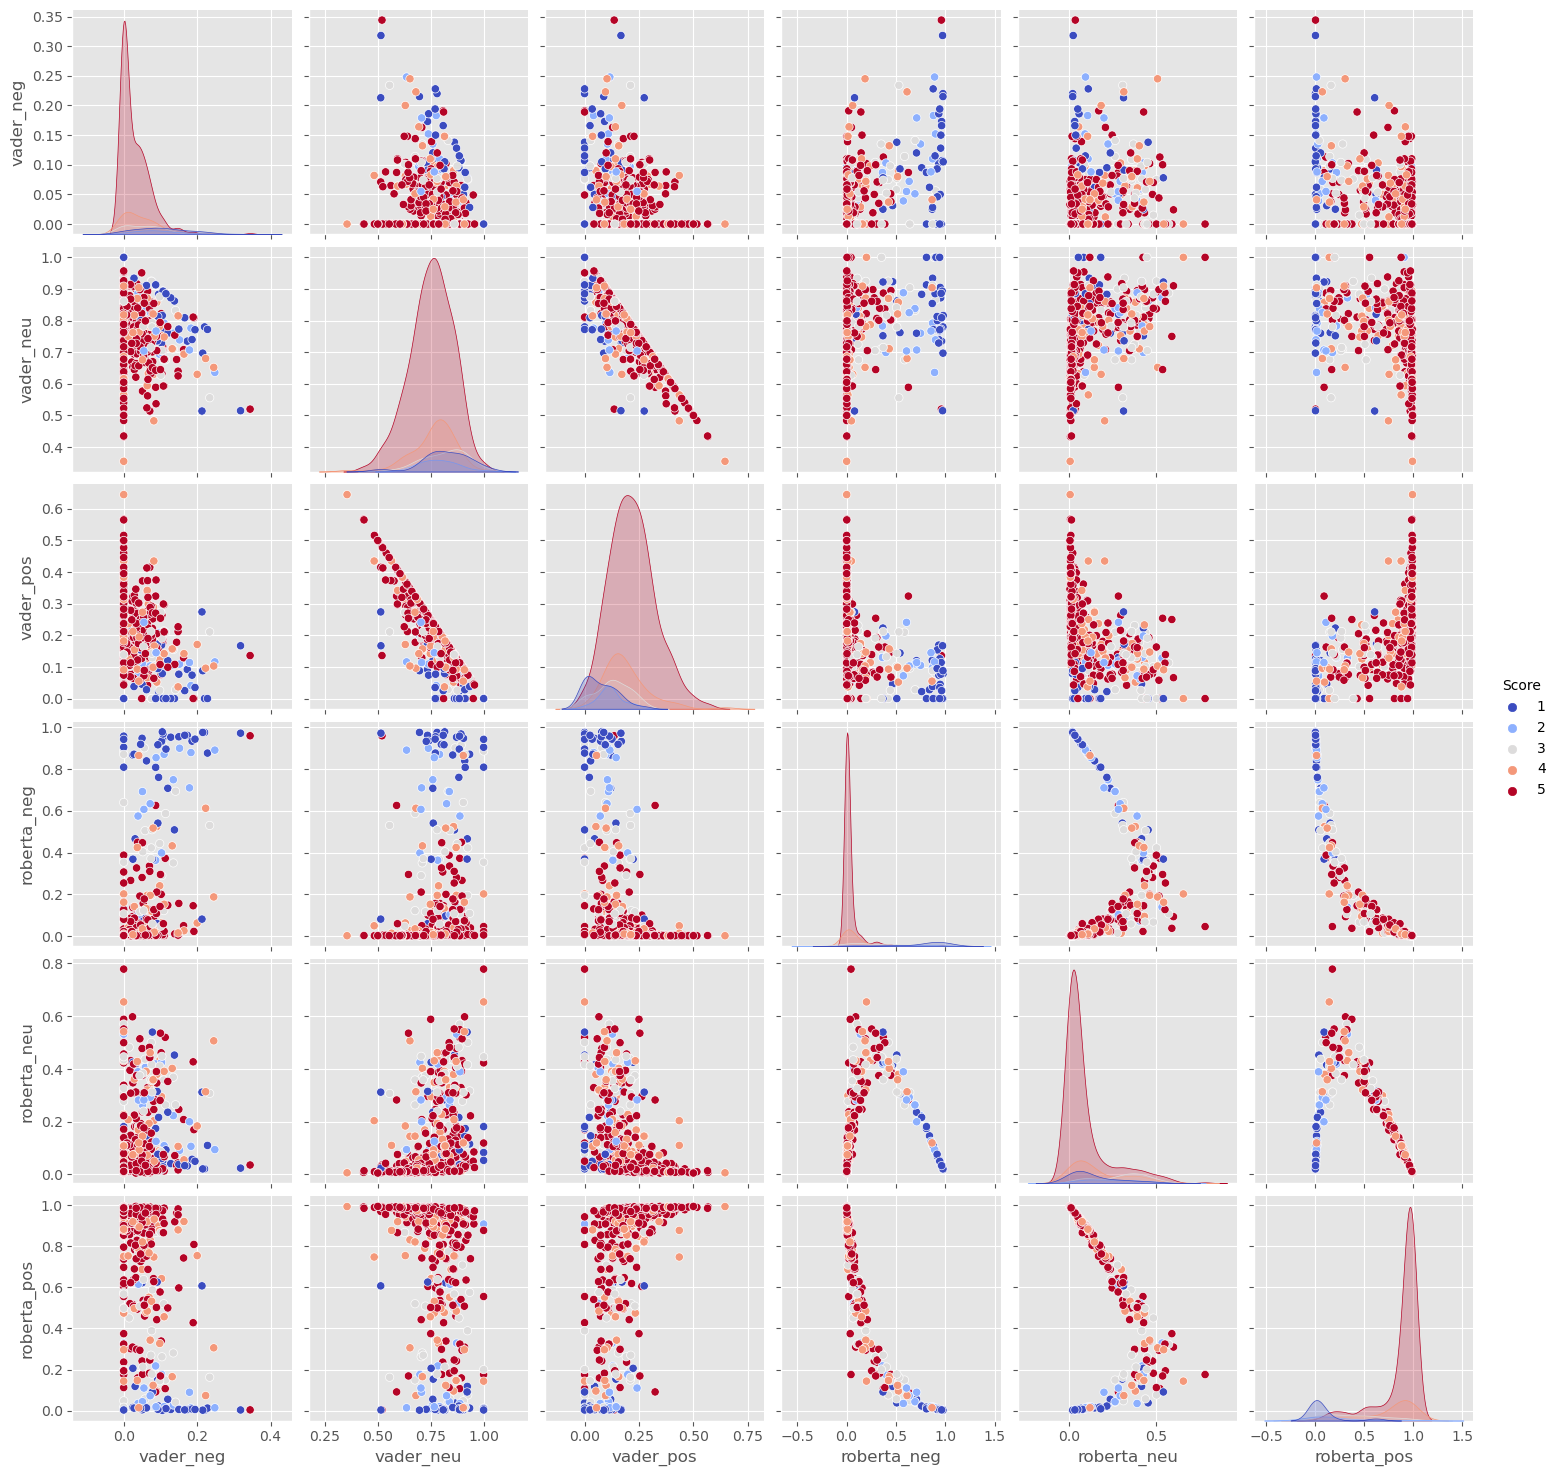

In [51]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='coolwarm')
plt.show()

## Revisar ejemplos

Para encontrar ejemplos en los que la puntuación del modelo y la puntuación de la reseña difieren más, podemos consultar su DataFrame para encontrar reseñas en las que la puntuación de sentimiento del modelo y la calificación de estrellas de la reseña estén en desacuerdo. Específicamente, podemos observar casos extremos como el sentimiento positivo en reseñas de 1 estrella y el sentimiento negativo en reseñas de 5 estrellas. Así es como podría abordarlo:

Encontrar ejemplos de reseñas positivas de 1 estrella y negativas de 5 estrellas

Revisión positiva de 1 estrella:

Encuentre la reseña con la puntuación de sentimiento positivo más alta (roberta_pos) entre aquellas con una calificación de 1 estrella.

Revisión negativa de 5 estrellas:

Encuentre la reseña con la puntuación de sentimiento negativo más alta (roberta_neg) entre aquellas con una calificación de 5 estrellas.

Este código generará una cuadrícula de diagramas de dispersión que muestran las relaciones por pares entre las puntuaciones de sentimiento de VADER y RoBERTa, con puntos coloreados por la puntuación de revisión.

In [52]:
import pandas as pd

# Find the most positive 1-star review
positive_1_star_reviews = results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)
most_positive_1_star_review = positive_1_star_reviews['Text'].values[0] if not positive_1_star_reviews.empty else "No 1-star reviews found"

# Find the most negative 5-star review
negative_5_star_reviews = results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)
most_negative_5_star_review = negative_5_star_reviews['Text'].values[0] if not negative_5_star_reviews.empty else "No 5-star reviews found"

print("Most Positive 1-Star Review:")
print(most_positive_1_star_review)
print("\nMost Negative 5-Star Review:")
print(most_negative_5_star_review)

Most Positive 1-Star Review:
I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.

Most Negative 5-Star Review:
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


## Transformers Pipeline

Usar la API de canalización de la biblioteca de transformadores es una excelente manera de realizar rápidamente análisis de sentimiento con modelos previamente entrenados. La función de canalización simplifica el proceso de aplicar un modelo a datos de texto, lo que nos permite obtener fácilmente puntuaciones o etiquetas de opinión.

In [55]:
!pip install tensorflow keras

DEPRECATION: Loading egg at c:\users\jcnaz\anaconda3\lib\site-packages\huggingface_hub-0.24.2-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [57]:
from transformers import pipeline

# Forzar el uso de PyTorch
sent_pipeline = pipeline("sentiment-analysis", framework="pt")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Usar sent_pipeline para analizar el sentimiento de un solo texto es sencillo.


In [59]:
from transformers import pipeline

# Forzar el uso de PyTorch en lugar de TensorFlow
sent_pipeline = pipeline("sentiment-analysis", framework="pt")

# Analizar el sentimiento de un texto
text = "Make sure to like and subscribe!"
result = sent_pipeline(text)

# Imprimir el resultado
print(result)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9991742968559265}]


In [60]:
# Guardar el pipeline completo en una carpeta
sent_pipeline.save_pretrained("./sentiment_pipeline")


In [67]:
from transformers import pipeline

# Cargar el pipeline desde la carpeta guardada y forzar el uso de PyTorch
sent_pipeline = pipeline("sentiment-analysis", model="./sentiment_pipeline", framework="pt")

# Usar el pipeline cargado
result = sent_pipeline("This is a normal product!")
print(result)


[{'label': 'POSITIVE', 'score': 0.986191987991333}]
